**Name:Ayush Chaware**

**Roll no.:22**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.cm as cm # for color maps
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

#### Understanding Data

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

#### Cheking Null Values

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# [rows all, collums[3,4]]
# annual income v/s spending Score
x = df.iloc[:, [3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### 2D Cluster Based on Age and Spending Score

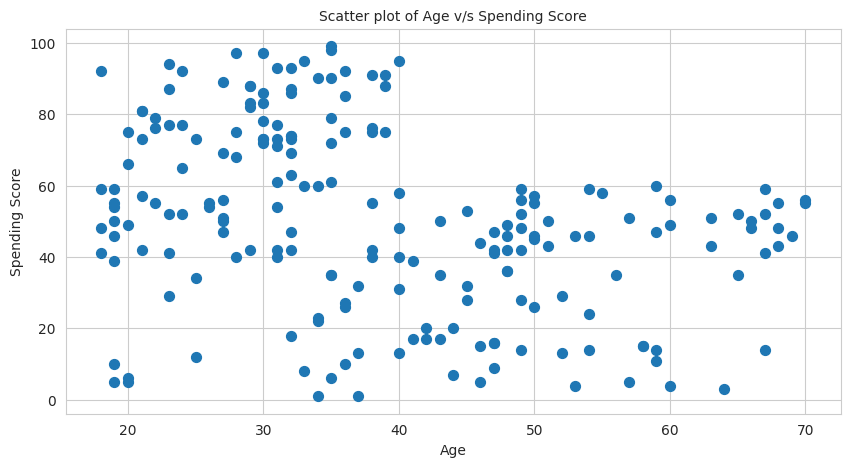

In [ ]:
plt.figure(1 , figsize = (10 , 5))
plt.title('Scatter plot of Age v/s Spending Score', fontsize = 10)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = df, s = 50)
plt.show()

In [ ]:
#Find optimum number of cluster
from sklearn.cluster import KMeans
# X1 = df[['Age', 'Spending Score (1-100)']].iloc[:,:].values
X1 = x
sse = [] #SUM OF SQUARED ERROR
for n in range (1,11):
  algo = (KMeans(n_clusters=n,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 0 ))
  algo.fit(X1)
  sse.append(algo.inertia_)
sse

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25095.70320999756,
 21830.041978049434,
 20736.679938924128]

Elbow Method To Determinne k value

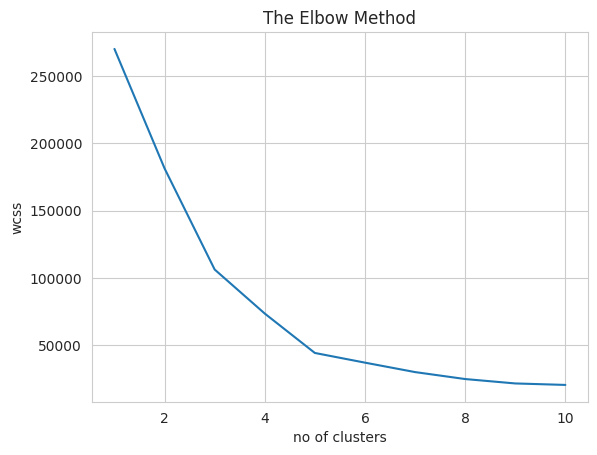

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K
plt.plot(range(1,11), sse)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

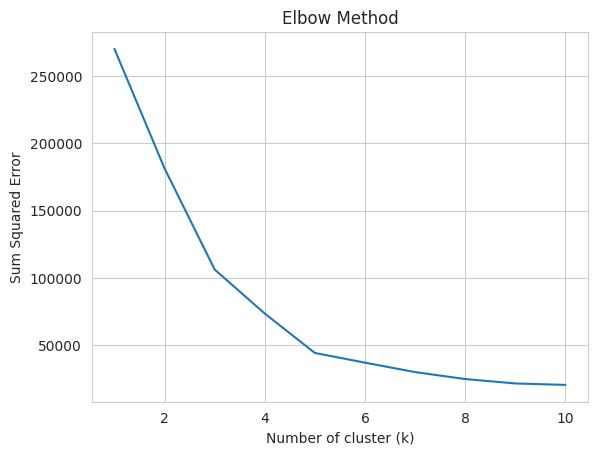

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

Elbow value is 4 i.e K= 5

In [ ]:
# k = 4 as elbow value is 5
kmeans = KMeans(n_clusters = 5, random_state = 2)
kmeans.fit(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=2)

In [ ]:
# Find the cluster center
centroids1 = kmeans.cluster_centers_
centroids1

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

In [ ]:
# Predict the cluster group:
pred = kmeans.fit_predict(X1)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

Plot the cluster center with data points

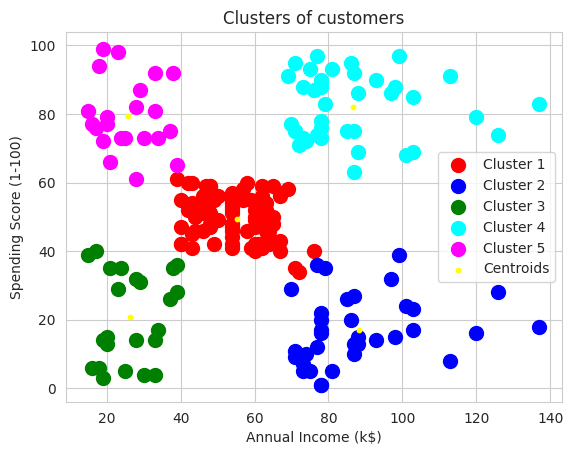

In [ ]:
plt.scatter(X1[pred == 0, 0], X1[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[pred == 1, 0], X1[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[pred == 2, 0], X1[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X1[pred == 3, 0], X1[pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X1[pred == 4, 0], X1[pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 10, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Text(0, 0.5, 'Spending Score')

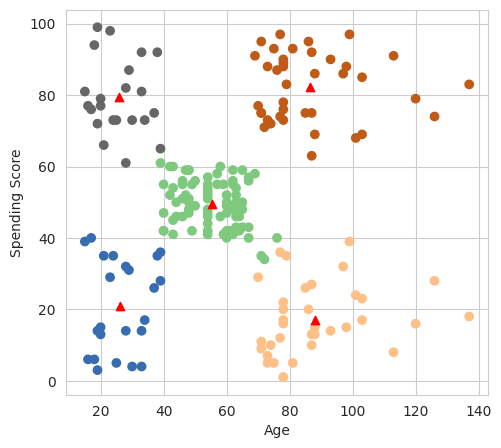

In [ ]:
import matplotlib.cm as cm

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X1[:,0],X1[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("Age")
plt.ylabel("Spending Score")


### K=4

In [ ]:
# k = 4 as elbow value is 5
kmeans = KMeans(n_clusters = 4, random_state = 2)
kmeans.fit(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=2)

In [ ]:
# Find the cluster center
centroids1 = kmeans.cluster_centers_
centroids1

array([[87.        , 18.63157895],
       [26.30434783, 20.91304348],
       [48.26      , 56.48      ],
       [86.53846154, 82.12820513]])

In [ ]:
# Predict the cluster group:
pred = kmeans.fit_predict(X1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


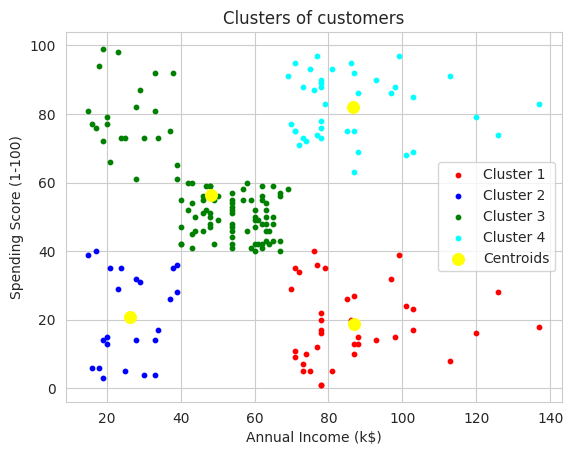

In [ ]:
plt.scatter(X1[pred == 0, 0], X1[pred == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X1[pred == 1, 0], X1[pred == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[pred == 2, 0], X1[pred == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X1[pred == 3, 0], X1[pred == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Text(0, 0.5, 'Spending Score')

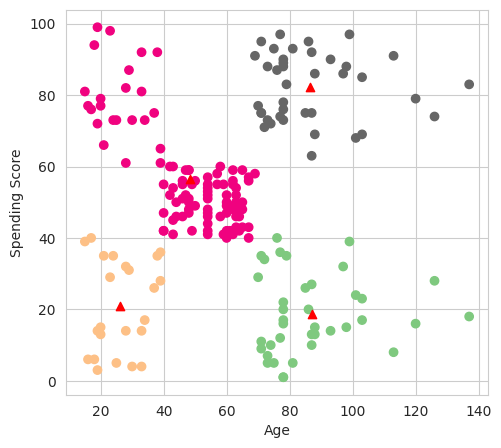

In [ ]:
import matplotlib.cm as cm

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X1[:,0],X1[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("Age")
plt.ylabel("Spending Score")
